# Assignment 1

In [1]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

In [2]:
# we define a helper function to print the image using `matplotlib`

# this prints colored image
def print_image(img, isGray=False, title="Image"):
    # OpenCV reads images in BGR, and matplotlib reads images in RGB
    # so, we switch the color channels using `cvtColor` method
    
    # if isGray = True, we first grayscale the image using the same `cvtColor` method
    if isGray:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_colored = cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB)
    else:
        img_colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10,6))
    plt.imshow(img_colored)
    plt.axis(False)
    plt.title(title)
    plt.show()


In [3]:
def print_single_channel_image(img, title="Image"):
    # convert BGR to RGB
    img_colored = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10,6))
    plt.imshow(img_colored)
    plt.axis(False)
    plt.title(title)
    plt.show()

# 1.

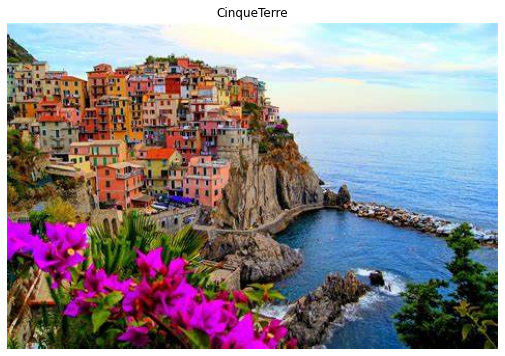

In [52]:
img = cv2.imread("./data/Images/CinqueTerre.jpg")
print_image(img, title="CinqueTerre")

## 1.(a)

In [5]:
height, width, channels = img.shape
print(height, width, channels)

315 474 3


## 1.(b)

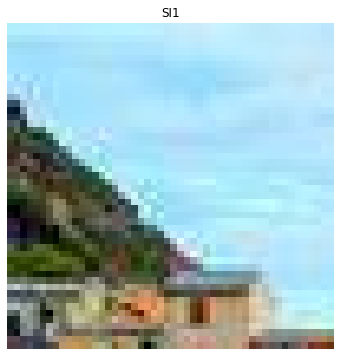

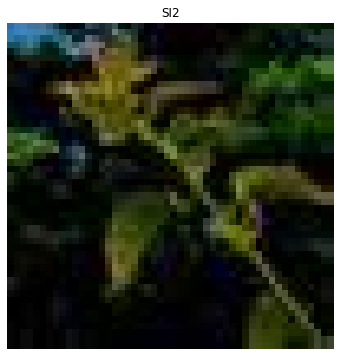

In [7]:
# top left
subimg1 = img[:50, :50, :]
print_image(subimg1, title="SI1")

# bottom right
subimg2 = img[height-50:, width-50:, :]
print_image(subimg2, title="SI2")

In [11]:
SSD = np.sum(np.square(subimg1 - subimg2))
SSD

781484

# 2.

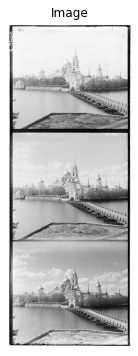

In [9]:
# read the image as single channel grayscaled image
img = cv2.imread("./data/Images/monastery.jpg", cv2.IMREAD_GRAYSCALE)
print_image(img)

In [10]:
h,w = img.shape
print(h,w)

1024 391


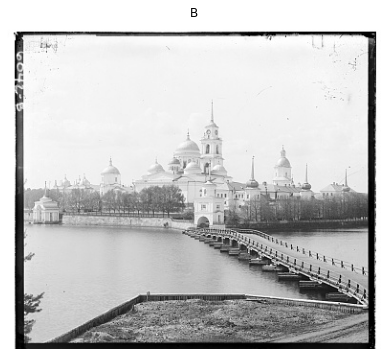

(341, 391)


In [11]:
B = img[:341, :]
print_image(B, title="B")
print(B.shape)

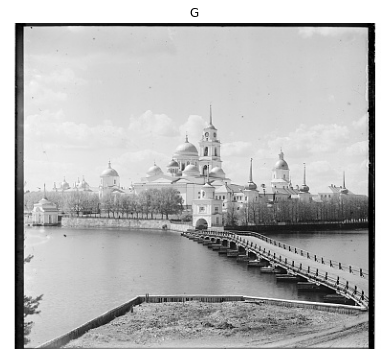

(341, 391)


In [12]:
G = img[342:683, :]
print_image(G, title="G")
print(G.shape)

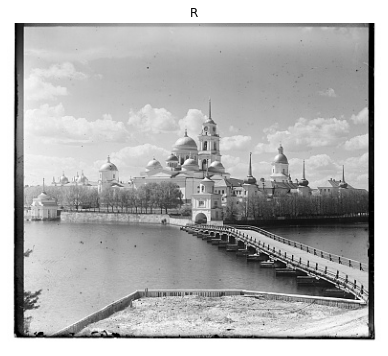

(341, 391)


In [13]:
R = img[683:, :]
print_image(R, title="R")
print(R.shape)

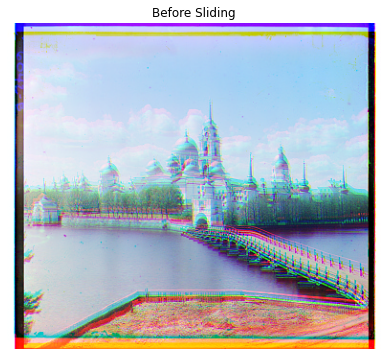

In [14]:
# print image before merging
merged_img = cv2.merge([B,G,R])
print_image(merged_img, title="Before Sliding")

## 2.(a)

In [15]:
def slide_compare(img1, img2, search_window=10):
    # assuming img1: h, w; img2: h-search_window, w-search_window
    h,w = img1.shape

    dh, dw = 0, 0
    best_ssd = np.inf

    for i in range(search_window):
        for j in range(search_window):
            img1_slice = img1[i:h+i-search_window, j:w+j-search_window]
            curr_ssd = np.sum(np.square(img1_slice - img2))

            if curr_ssd < best_ssd:
                best_ssd = curr_ssd
                dh, dw = i, j
    
    return dh, dw, best_ssd

In [16]:
# we compare B,R with G and find the slice of G which gives the best ssd

def align_merge(B, G, R, search_window=10):
    # compare B, R, with G
    # assume the shape of B, G, R are the same
    h,w = B.shape

    best_ssd = np.inf
    best_b_ssd = np.inf
    best_r_ssd = np.inf

    best_B = None
    best_G = None
    best_R = None

    for ki in range(search_window):
        for kj in range(search_window):
            G_slice = G[ki:h+ki-search_window, kj:w+kj-search_window]

            b_dh, b_dw, b_ssd = slide_compare(B, G_slice, search_window)
            r_dh, r_dw, r_ssd = slide_compare(R, G_slice, search_window)
            
            curr_ssd = r_ssd + b_ssd

            if curr_ssd < best_ssd:
                best_b_ssd, best_r_ssd = b_ssd, r_ssd
                best_ssd = curr_ssd

                best_B = B[b_dh:h+b_dh-search_window, b_dw:w+b_dw-search_window]
                best_R = R[r_dh:h+r_dh-search_window, r_dw:w+r_dw-search_window]
                best_G = G_slice
            
    # merge the images
    merged_img = cv2.merge([best_B, best_G, best_R])
    return merged_img, best_b_ssd, best_r_ssd, best_ssd


## 2.(b), (c), (d)

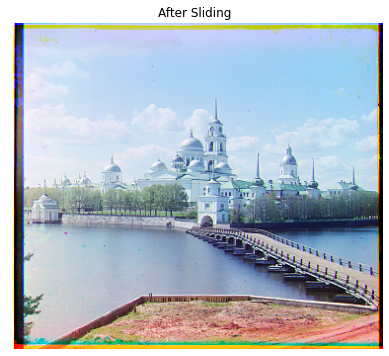

In [23]:
merged_img, best_b_ssd, best_r_ssd, best_ssd = align_merge(B,G,R, search_window = 10)
print_image(merged_img, title="After Sliding")

In [18]:
print("Best B vs G SSD:", best_b_ssd)
print("Best R vs G SSD:", best_r_ssd)
print("Best Total SSD:", best_ssd)

Best B vs G SSD: 12843952
Best R vs G SSD: 12527203
Best Total SSD: 25371155
